### Modelos Pré-Treinados

#### O que são modelos pré-treinados?

Modelos pré-treinados são redes neurais que já foram treinadas em grandes conjuntos de dados, como ImageNet, para resolver tarefas gerais, como classificação de imagens. Esses modelos capturam representações úteis dos dados, como características de baixo nível (bordas, texturas) e de alto nível (formas complexas e objetos inteiros). Por isso, podem ser utilizados como ponto de partida para resolver problemas específicos sem a necessidade de treinar uma rede do zero, economizando tempo e recursos computacionais.

#### Vantagens do Uso de Modelos Pré-Treinados
- **Redução de custos:** O treinamento de grandes redes neurais do zero requer recursos computacionais significativos e tempo.
- **Generalização:** Modelos pré-treinados frequentemente generalizam melhor para novas tarefas devido à riqueza de seus dados de treinamento.
- **Transfer Learning:** Ajustar um modelo pré-treinado para uma tarefa específica é simples. Isso pode ser feito ao congelar camadas inferiores e treinar apenas as camadas superiores para o novo domínio.

#### Como utilizá-los?
Os modelos pré-treinados geralmente vêm acompanhados de pesos otimizados para tarefas específicas e métodos para pré-processar os dados de entrada. Em bibliotecas como o PyTorch, essas funcionalidades estão disponíveis de forma acessível.

#### Hubs de Modelos Pré-Treinados
Existem hubs especializados para encontrar e utilizar modelos pré-treinados. Um dos mais conhecidos é o **torchvision**, que oferece uma variedade de modelos treinados no ImageNet e outras tarefas relacionadas a visão computacional. Para acessar os modelos disponíveis e sua documentação, você pode visitar o [hub oficial do torchvision](https://pytorch.org/vision/main/models.html).

In [1]:
import torch
import requests
import numpy as np
from PIL import Image
from torchvision import models
import matplotlib.pyplot as plt

In [2]:
# Importa os pesos pré-treinados do modelo ResNet50 da biblioteca torchvision
weights = models.ResNet50_Weights.IMAGENET1K_V1
# Instancia o modelo ResNet50 com os pesos pré-treinados no ImageNet
model = models.resnet50(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


In [3]:
# Função para carregar uma imagem a partir de uma URL
def load_image_from_url(url):
    response = requests.get(url)  # Faz uma requisição HTTP para obter a imagem
    img = Image.open(requests.get(url, stream=True).raw)  # Abre a imagem diretamente do stream
    return img  # Retorna a imagem carregada

# Função para plotar a imagem carregada
def plot_image(img):
    img = np.array(img)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Função para obter as 5 principais previsões do modelo
def get_top5_predictions(model, img, weights=weights):
    # Inferência
    model.eval()
    with torch.no_grad():
        output = model(img)

    # Converte logits em probabilidades
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Obtém as 5 maiores probabilidades e seus índices
    top5_prob, top5_catid = torch.topk(probabilities, 5)

    # Obtém as categorias associadas ao conjunto de pesos
    categories = weights.meta["categories"]

    # Cria uma lista das 5 principais categorias com suas respectivas probabilidades
    top5 = [(categories[catid], prob.item()) for catid, prob in zip(top5_catid, top5_prob)]
    return top5

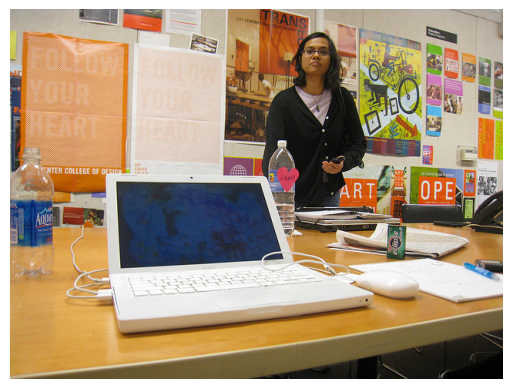

notebook: 0.49
laptop: 0.28
desk: 0.15
mouse: 0.02
web site: 0.01



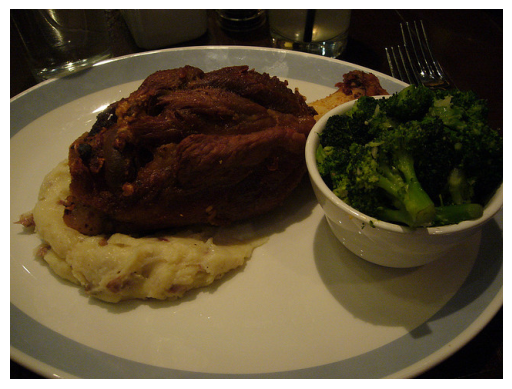

mashed potato: 0.76
meat loaf: 0.13
broccoli: 0.07
plate: 0.02
guacamole: 0.01



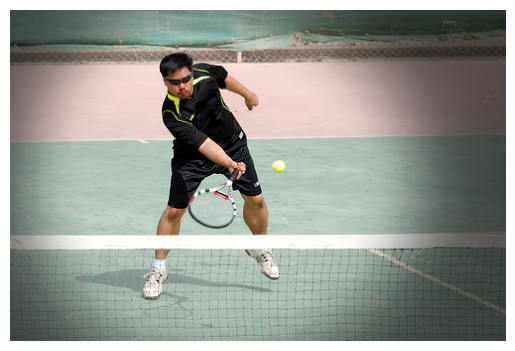

racket: 0.76
tennis ball: 0.24
ping-pong ball: 0.00
volleyball: 0.00
soccer ball: 0.00



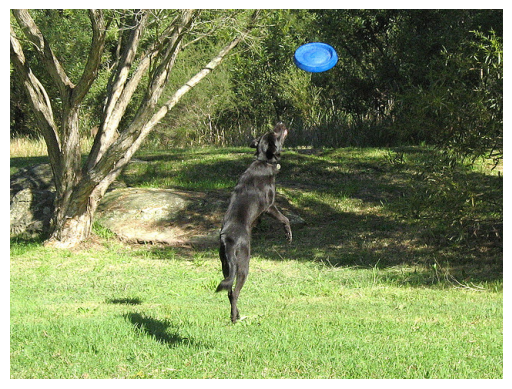

Scottish deerhound: 0.14
Irish wolfhound: 0.14
wallaby: 0.10
miniature schnauzer: 0.08
groenendael: 0.06



In [4]:
# Lista de URLs de imagens para teste
urls = [
    "http://images.cocodataset.org/test-stuff2017/000000024309.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000028117.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000006149.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000004954.jpg",
]

# Obtém a transformação recomendada para pré-processar as imagens
# A transformação é configurada automaticamente para o conjunto de pesos utilizados
preprocess = weights.transforms()

# Para cada URL...
for url in urls:
    # Carrega a imagem da URL fornecida
    image = load_image_from_url(url)

    # Mostra a imagem carregada em um gráfico
    plot_image(image)

    # Pré-processa a imagem para que tenha o formato esperado pelo modelo
    image = preprocess(image).unsqueeze(0)

    # Obtém as 5 principais previsões do modelo para a imagem processada
    predictions = get_top5_predictions(model, image)

    for cat, prob in predictions:
        print(f"{cat}: {prob:.2f}")
    print()

## Exercícios

### Exercício 1
Compare os resultados obtidos com o conjunto de pesos `IMAGENET1K_V2`.

In [5]:
# carregar pesos do v2
weights_ex1 = models.ResNet50_Weights.IMAGENET1K_V2

# carregar modelo
model_ex1 = models.resnet50(weights=weights_ex1)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 153MB/s]


In [17]:
# metodo para plotar o top 5 de acordo com o modelo
def plot_predictions(model, model_weights):
  preprocess = model_weights.transforms()

  for url in urls:
      image = load_image_from_url(url)

      plot_image(image)

      image = preprocess(image).unsqueeze(0)

      predictions = get_top5_predictions(model, image)

      for cat, prob in predictions:
          print(f"{cat}: {prob:.2f}")
      print()

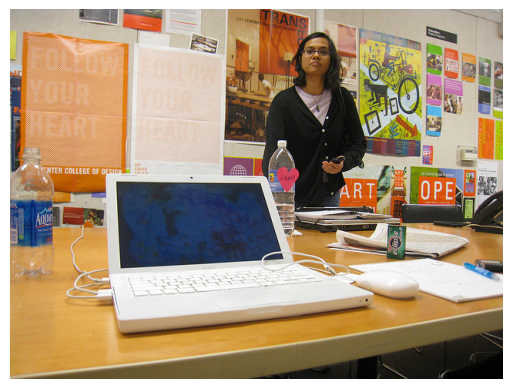

desk: 0.16
laptop: 0.07
mouse: 0.06
notebook: 0.04
monitor: 0.02



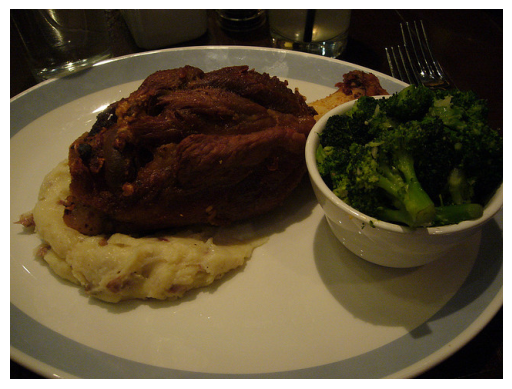

mashed potato: 0.37
meat loaf: 0.07
plate: 0.05
broccoli: 0.04
ice cream: 0.00



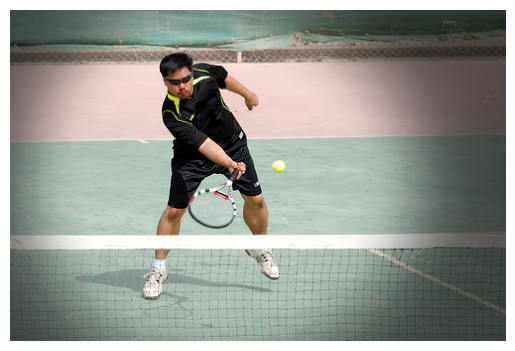

racket: 0.30
tennis ball: 0.11
ping-pong ball: 0.01
scuba diver: 0.00
dugong: 0.00



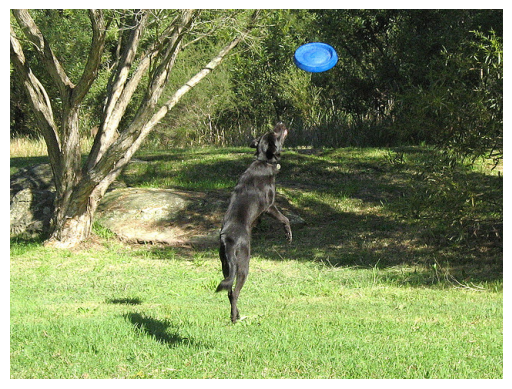

malinois: 0.12
American Staffordshire terrier: 0.04
Great Dane: 0.04
French bulldog: 0.03
kelpie: 0.03



In [18]:
plot_predictions(model_ex1, weights_ex1)

Utilizando a ImageNetV2 as classes preditas mudaram, na maioria dos casos, bem como também a probabilidade de cada um dos top 5 elementos preditos. O que evidencia a alta "volatilidade" com as trocas de pesos.

### Exercício 2
Compare os resultados obtidos com o modelo VGG16.

In [19]:
weights_ex2 = models.VGG16_Weights.IMAGENET1K_V1

# carregar modelo vgg
model_ex2 = models.vgg16(weights=weights_ex2)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 81.5MB/s]


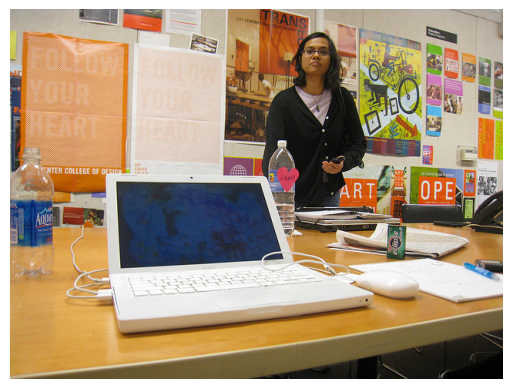

notebook: 0.31
laptop: 0.27
desk: 0.12
monitor: 0.05
mouse: 0.04



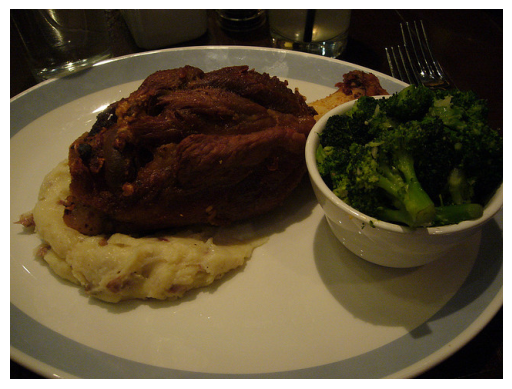

mashed potato: 0.65
meat loaf: 0.24
broccoli: 0.04
plate: 0.03
guacamole: 0.02



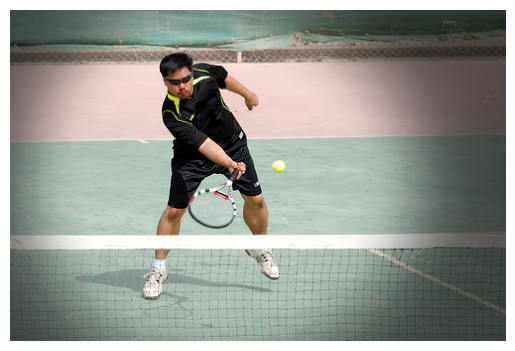

racket: 0.98
tennis ball: 0.02
ping-pong ball: 0.00
unicycle: 0.00
volleyball: 0.00



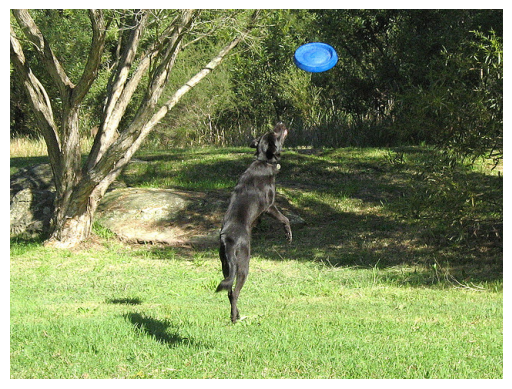

kelpie: 0.19
Labrador retriever: 0.13
Staffordshire bullterrier: 0.10
German shepherd: 0.09
flat-coated retriever: 0.07



In [20]:
plot_predictions(model_ex2, weights_ex2)

A troca da rede pela VGG afetou as classes preditas ao final de cada imagem.